<b>
<p>
<center>
<font size="5">
Popular Machine Learning Methods: Idea, Practice and Math
</font>
</center>
</p>

<p>
<center>
<font size="4">
Part 3, Chapter 2, Section 3: Convolutional Neural Networks
</font>
</center>
</p>
    
<p>
<center>
<font size="4">
Final project
</font>
</center>
</p>

<p>
<center>
<font size="3">
Data Science, Columbian College of Arts & Sciences, George Washington University
</font>
</center>
</p>

<p>
<center>
<font size="3">
Yixi Liang
</font>
</center>
</p>
</b>

## Google drive

In [1]:
abspath_curr = 'C:/Users/REX/Desktop/6202 Machine Learning/Final Project'

# Get the absolute path of the deep utilities folder
abspath_util_deep = 'C:/Users/REX/Desktop/teaching-master/gwu/machine_learning_I/spring_2022/code/utilities/p3_deep_learning'

## Warning

In [2]:
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

## Matplotlib

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline 

# Set matplotlib sizes
plt.rc('font', size=20)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20)
plt.rc('figure', titlesize=20)

In [4]:
# %tensorflow_version 2.x 
import pandas as pd 
import os 
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Random seed

In [5]:
# The random seed
random_seed = 42

# Set random seed in tensorflow
tf.random.set_seed(random_seed)

# Set random seed in numpy
import numpy as np
np.random.seed(random_seed)

In [6]:
# Change working directory to the absolute path of the deep utilities folder
%cd $abspath_util_deep

# Import the deep utitilities
%run pmlm_utilities_deep.ipynb

C:\Users\REX\Desktop\teaching-master\gwu\machine_learning_I\spring_2022\code\utilities\p3_deep_learning


## Loading the data

In this case study, we will work on the [Plant Seedlings Classification](https://www.kaggle.com/competitions/plant-seedlings-classification/overview).

### Creating the directory for the data

In [7]:
train_path = abspath_curr + '/train/'
test_path = abspath_curr 

In [8]:
for dirpath, dirnames, filenames in os.walk(abspath_curr): 
     print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 4 directories and 10 images in 'C:/Users/REX/Desktop/6202 Machine Learning/Final Project'.
There are 0 directories and 6 images in 'C:/Users/REX/Desktop/6202 Machine Learning/Final Project\.ipynb_checkpoints'.
There are 4 directories and 0 images in 'C:/Users/REX/Desktop/6202 Machine Learning/Final Project\result'.
There are 0 directories and 5 images in 'C:/Users/REX/Desktop/6202 Machine Learning/Final Project\result\figure'.
There are 0 directories and 1 images in 'C:/Users/REX/Desktop/6202 Machine Learning/Final Project\result\model'.
There are 0 directories and 1 images in 'C:/Users/REX/Desktop/6202 Machine Learning/Final Project\result\model2'.
There are 0 directories and 1 images in 'C:/Users/REX/Desktop/6202 Machine Learning/Final Project\result\model3'.
There are 0 directories and 794 images in 'C:/Users/REX/Desktop/6202 Machine Learning/Final Project\test'.
There are 12 directories and 0 images in 'C:/Users/REX/Desktop/6202 Machine Learning/Final Project\train'.
Ther

## Load data  

In [9]:
data_train = tf.keras.preprocessing.image_dataset_from_directory(directory=train_path,
                                                                 label_mode="categorical", 
                                                                 shuffle=True,
                                                                 image_size=(224,224),
                                                                batch_size = 16, 
                                                                 seed=42,
                                                                validation_split=0.2,
                                                                   subset="training")

Found 4750 files belonging to 12 classes.
Using 3800 files for training.


In [10]:
data_valid = tf.keras.preprocessing.image_dataset_from_directory(directory=train_path,
                                                                 label_mode="categorical", 
                                                                 shuffle=False,
                                                                 image_size=(224,224),
                                                                batch_size = 16,
                                                                 seed=42,
                                                                validation_split=0.2,
                                                                   subset="validation")

Found 4750 files belonging to 12 classes.
Using 950 files for validation.


In [11]:
datagen = ImageDataGenerator()
data_test = datagen.flow_from_directory(test_path ,shuffle =False,batch_size=100,
                              target_size = (224,224),classes = ['test'])

Found 794 images belonging to 1 classes.


In [12]:
class_names = data_train.class_names
n_classes = len(class_names)

# Training VGG16

In [13]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result/model3/')
if not os.path.exists(directory):
    os.makedirs(directory)

## Building the architecture of the model

In [16]:
# Add the pretrained layers
pretrained_model = keras.applications.VGG16(include_top=False, weights='imagenet')

# Add GlobalAveragePooling2D layer
average_pooling = keras.layers.GlobalAveragePooling2D()(pretrained_model.output)

# Add the output layer
output = keras.layers.Dense(n_classes, activation='softmax')(average_pooling)

# Get the model
model = keras.Model(inputs=pretrained_model.input, outputs=output)

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0   

In [17]:
# For each layer in the pretrained model
for layer in pretrained_model.layers:
    # Freeze the layer
    layer.trainable = False

In [18]:
# ModelCheckpoint callback
model_checkpoint_cb = keras.callbacks.ModelCheckpoint(filepath=abspath_curr + '/result/model3/model.h5',
                                                      save_best_only=True,
                                                      save_weights_only=True)

# EarlyStopping callback
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

# ReduceLROnPlateau callback
reduce_lr_on_plateau_cb = keras.callbacks.ReduceLROnPlateau(factor=0.1,
                                                            patience=1)

In [19]:
# Compile the model
model.compile(loss='categorical_crossentropy',
             optimizer = tf.keras.optimizers.SGD(learning_rate=0.01), 
             metrics=['accuracy']) 

In [20]:
# Train, evaluate and save the best model
history = model.fit(data_train,
                    epochs=5,
                    validation_data=data_valid,
                    callbacks=[model_checkpoint_cb,
                               early_stopping_cb,
                               reduce_lr_on_plateau_cb])

Epoch 1/5
238/238 [==============================] - 31s 112ms/step - loss: 1.6129 - accuracy: 0.5234 - val_loss: 1.2159 - val_accuracy: 0.5800 - lr: 0.0100
Epoch 2/5
238/238 [==============================] - 24s 100ms/step - loss: 0.7761 - accuracy: 0.7363 - val_loss: 0.4929 - val_accuracy: 0.8484 - lr: 0.0100
Epoch 3/5
238/238 [==============================] - 24s 99ms/step - loss: 0.6244 - accuracy: 0.7955 - val_loss: 0.8338 - val_accuracy: 0.7568 - lr: 0.0100
Epoch 4/5
238/238 [==============================] - 24s 101ms/step - loss: 0.4730 - accuracy: 0.8503 - val_loss: 0.3885 - val_accuracy: 0.8926 - lr: 1.0000e-03
Epoch 5/5
238/238 [==============================] - 24s 100ms/step - loss: 0.4490 - accuracy: 0.8579 - val_loss: 0.3887 - val_accuracy: 0.8895 - lr: 1.0000e-03


In [21]:
#Evaluate on full data
model.evaluate(data_valid)

60/60 [==============================] - 5s 79ms/step - loss: 0.3887 - accuracy: 0.8895


[0.3887452185153961, 0.8894736766815186]

In [22]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result/figure/')
if not os.path.exists(directory):
    os.makedirs(directory)

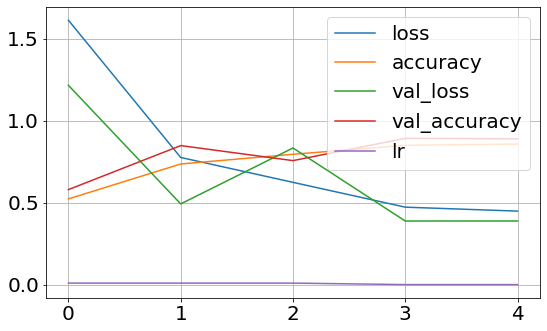

In [23]:
import pandas as pd

# Create a figure
pd.DataFrame(history.history).plot(figsize=(8, 5))

# Set grid
plt.grid(True)

# Save and show the figure
plt.tight_layout()
plt.savefig(abspath_curr + '/result/figure/learning_curve_before_unfreezing-model3.pdf')
plt.show()

## Unfreezing the pretrained layers

In [24]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_path,
                                                                 label_mode="categorical", 
                                                                 shuffle=True,
                                                                 image_size=(224,224),
                                                                batch_size = 32)

Found 4750 files belonging to 12 classes.


In [25]:
# For each layer in the pretrained model
for layer in pretrained_model.layers:
    # Unfreeze the layer
    layer.trainable = True

## Compiling the model
Here we use a lower learning rate (by a factor of 10) of Adam optimizer, so that it is less likely to compromise the pretrained weights.

In [26]:
# Compile the model
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Training the model

In [27]:
# Train, evaluate and save the best model
history = model.fit(data_train,
                    epochs=1000,
                    validation_data=data_valid,
                    callbacks=[model_checkpoint_cb,
                               early_stopping_cb,
                               reduce_lr_on_plateau_cb])

Epoch 1/1000
238/238 [==============================] - 62s 243ms/step - loss: 0.6613 - accuracy: 0.7874 - val_loss: 0.3304 - val_accuracy: 0.8937 - lr: 0.0010
Epoch 2/1000
238/238 [==============================] - 57s 239ms/step - loss: 0.2277 - accuracy: 0.9237 - val_loss: 0.1124 - val_accuracy: 0.9621 - lr: 0.0010
Epoch 3/1000
238/238 [==============================] - 56s 236ms/step - loss: 0.1037 - accuracy: 0.9639 - val_loss: 0.0970 - val_accuracy: 0.9737 - lr: 0.0010
Epoch 4/1000
238/238 [==============================] - 56s 236ms/step - loss: 0.0612 - accuracy: 0.9829 - val_loss: 0.0498 - val_accuracy: 0.9884 - lr: 0.0010
Epoch 5/1000
238/238 [==============================] - 58s 242ms/step - loss: 0.0295 - accuracy: 0.9921 - val_loss: 0.0290 - val_accuracy: 0.9947 - lr: 0.0010
Epoch 6/1000
238/238 [==============================] - 57s 241ms/step - loss: 0.0651 - accuracy: 0.9853 - val_loss: 0.0247 - val_accuracy: 0.9937 - lr: 0.0010
Epoch 7/1000
238/238 [==================

## Plotting the learning curve

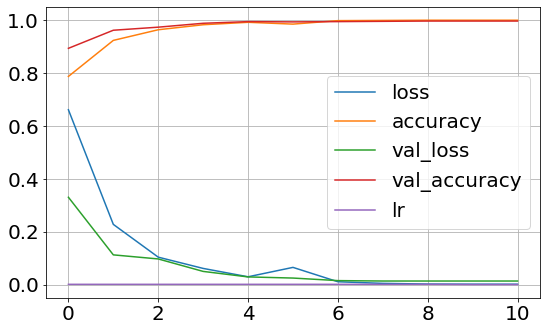

In [28]:
# Create a figure
pd.DataFrame(history.history).plot(figsize=(8, 5))

# Set grid
plt.grid(True)

# Save and show the figure
plt.tight_layout()
plt.savefig(abspath_curr + '/result/figure/learning_curve_after_unfreezing_model3.pdf')
plt.show()

# Testing

## Loading the saved model

In [29]:
# Load the saved model
model.load_weights(filepath=abspath_curr + '/result/model3/model.h5')

In [30]:
#Prepare the Test data using Tensorflow Image Generator

datagen = ImageDataGenerator()
gen = datagen.flow_from_directory(test_path ,shuffle =False,batch_size=100,
                              target_size = (224,224),classes = ['test'])

Found 794 images belonging to 1 classes.


In [31]:
prediction = model.predict(gen)
prediction.shape

(794, 12)

In [32]:
class_names[tf.argmax(prediction[2])]

'Sugar beet'

In [33]:
#Read sample submission file 
sample_submission = pd.read_csv(abspath_curr + '/sample_submission.csv')
sample_submission.head()

,file,species
0,0021e90e4.png,Sugar beet
1,003d61042.png,Sugar beet
2,007b3da8b.png,Sugar beet
3,0086a6340.png,Sugar beet
4,00c47e980.png,Sugar beet


In [34]:
len(sample_submission)

794

In [35]:
#Prepare prediction results
predict_class = []
for pred in prediction: 
    predict_class.append(class_names[tf.argmax(pred)])

predict_class[:10]

['Small-flowered Cranesbill',
 'Fat Hen',
 'Sugar beet',
 'Common Chickweed',
 'Sugar beet',
 'Loose Silky-bent',
 'Common Chickweed',
 'Fat Hen',
 'Loose Silky-bent',
 'Loose Silky-bent']

In [36]:
submission = pd.DataFrame({'file':sample_submission['file'],'species':predict_class})
submission.head()

,file,species
0,0021e90e4.png,Small-flowered Cranesbill
1,003d61042.png,Fat Hen
2,007b3da8b.png,Sugar beet
3,0086a6340.png,Common Chickweed
4,00c47e980.png,Sugar beet


In [37]:
submission.to_csv(abspath_curr + '/submission3.csv', index=False)

In [38]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0   